## Problem Understanding

The problem statement assumes we work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 
In this case study, we will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
you
 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



## Importing packages

In [2]:
import pandas as pd

# pandas settings for configuring max rows and columns displayed along with number of digits displayed in the precision
pd.set_option('display.max_rows', 150, 'display.max_columns', 150)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

## Reading and Cleaning the dataset

In [6]:
# performing safe dataset reading and loading operations
loan_df = pd.read_csv('loan.csv', dtype='unicode', error_bad_lines=False, index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [10]:
loan_df.shape

(39717, 111)

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


### Data Cleaning
- Need to fix rows and columns
- Need to fix missing values
- Need to standardise values
- Need to fix invalid values
- Need to  filter data

#### 1. Checklist for Fixing Rows
#### 2. Checklist for Fixing Columns
#### 3. Checklist for missing values
#### 4. Checklist for Standardise values
#### 5. Checklist for Fixing invalid values
#### 6. Checklist for Filtering Data

In [12]:
# Cleaning Data by removing all columns that have all null values
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [25]:
missing_data_per = loan_df.isnull().sum() * 100 / len(loan_df)
missing_value_df = pd.DataFrame({
        'column_name': loan_df.columns,
        'missing_data_per': missing_data_per.round(2)
})
missing_value_df.sort_values('missing_data_per', inplace=True)
missing_value_df.columns
# 54 columns have all NULL values
(missing_value_df['missing_data_per'] == 100.00).sum()

Index(['column_name', 'missing_data_per'], dtype='object')

In [26]:
# Let's remove cols that have all null values in them for cleaning the dataframe
loan_df = loan_df.dropna(axis=1, how='all')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0,0,13,0,7274,13.10%,40,f,0,0,2822.969293,1213.88,2500,322.97,0,0,0,Jul-10,80.9,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.4,1,Dec-86,1,5,0,6,0,8847,26.90%,9,f,0,0,9913.491822,1020.51,8500,1413.49,0,0,0,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,1e+05,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.3,0,Oct-98,0,0,0,11,0,9698,19.40%,2

In [28]:
# Removing these additional columns we don't need as they are mostly nulls.
loan_df = loan_df.drop([
      'desc', 'member_id', 'id', 'url', 'next_pymnt_d',
      'mths_since_last_record', 'mths_since_last_delinq'
], axis=1)

In [27]:
# Deleting all columns having all values as same which won't add any value to the analysis overall
loan_df = loan_df.drop([
    'delinq_amnt', 'acc_now_delinq', 'application_type',
    'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
    'tax_liens', 'collections_12_mths_ex_med'
], axis=1)

In [ ]:
## Deleting string columns having most of as unique values
# null_columns_dropped_data = null_columns_dropped_data.drop(['emp_title'], axis=1)

In [29]:
## Check percentage of missing data
((loan_df.isnull().sum() * 100 / len(loan_df)).sort_values(
    ascending=False)).head(11)

emp_title              6.19
emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
total_pymnt            0.00
pub_rec                0.00
revol_bal              0.00
total_acc              0.00
dtype: float64

In [30]:
loan_df.shape

(39717, 41)

In [31]:
# Now Let's also format employment length column to have only numbers as it might further play an important role in our analysis.
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length'] = loan_df.emp_length.str.extract('(\d+)')
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0


In [32]:
# The 'pub_rec_bankruptcies' column values can be cleaned for further analysis.
print("Before cleaning:")
print(loan_df.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
loan_df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan_df.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [33]:
# Let's remove the '%' symbol from the 'int_rate' (intrest rates) column so that it can be used in calculations
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')

# Let's remove the '%' symbol from the 'revol_util' column so that it can be used in calculations
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

In [34]:
# convert amount columns into numeric data to find some correlation among important ones.
numeric_cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df[numeric_cols] = loan_df[numeric_cols].apply(pd.to_numeric)

In [35]:
# Lets take a look on important variable loan status in total loans issued

(loan_df.loan_status.value_counts()*100)/len(loan_df)

# Observations
# 82% loans were fully paid.
# Close to 14% loans were charged off

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [36]:
# Let's find the split of loan purpose over various reasons
(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

## Identify Categorical Columns
Count of no of unique values in the column

In [37]:
data = []
for row in loan_df.columns.tolist():
    data.append({'column': row, 'count': len(loan_df[row].unique())})

In [38]:
unique = pd.DataFrame(data).sort_values('count')

In [39]:
unique.head(19)

,column,count
3,term,2
14,loan_status,3
12,verification_status,3
40,pub_rec_bankruptcies,4
24,pub_rec,5
10,home_ownership,5
6,grade,7
22,inq_last_6mths,9
9,emp_length,11
20,delinq_2yrs,11


## Creating derived columns

In [40]:
# Lets derive some new columns using existing data as it may further used in analysis.
loan_df['term_months'] = loan_df['term'].str.rstrip('months')

In [42]:
# create month and year columns separately
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

loan_df.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,year,month
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,NaN,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0,0,"5,863.16",5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,36,2011,12


In [44]:
loan_df['revol_util_percentage'] = loan_df['revol_util'].str.rstrip('%')

## Updated column datatype

In [47]:
# Basic statistics with .describe() - Quantitative Variables
loan_df['loan_amnt'].describe()

count   39,717.00
mean    11,219.44
std      7,456.67
min        500.00
25%      5,500.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

In [50]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
          'revol_util_percentage']
loan_df[columns] = loan_df[columns].astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [52]:
# Creating a profit and loss column
loan_df['PnL']=(
    loan_df['total_pymnt']-loan_df['funded_amnt']
)*100/loan_df['funded_amnt']
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,year,month,revol_util_percentage,PnL
0,"5,000.00","5,000.00","4,975.00",36 months,10.65,162.87,B,B2,NaN,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,"13,648.00",83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,36,2011,12,83.70,17.26
1,"2,500.00","2,500.00","2,500.00",60 months,15.27,59.83,C,C4,Ryder,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,60,2011,12,9.40,-59.65


In [53]:
loan_df['loan_inc_ratio'] = loan_df.funded_amnt*100/loan_df.annual_inc

In [55]:
columns = ['total_acc', 'term_months']
loan_df[columns] = loan_df[columns].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [56]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan_df[columns] = loan_df[columns].apply(lambda x: x.astype('category'))

In [57]:
loan_df['annual_inc_lakhs'] = loan_df['annual_inc'] / 1000

In [58]:
loan_df['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [59]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,year,month,revol_util_percentage,PnL,loan_inc_ratio,annual_inc_lakhs
0,"5,000.00","5,000.00","4,975.00",36 months,10.65,162.87,B,B2,NaN,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,"13,648.00",83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,36,2011,12,83.70,17.26,20.83,24.00
1,"2,500.00","2,500.00","2,500.00",60 months,15.27,59.83,C,C4,Ryder,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,60,2011,12,9.40,-59.65,8.33,30.00
2,"2,400.00","2,400.00","2,400.00",36 months,15.96,84.33,C,C5,NaN,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,"2,956.00",98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,36,2011,12,98.50,25.24,19.59,12.25
3,"10,000.00","10,000.00","10,000.00",36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,"5,598.00",21,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,36,2011,12,21.00,22.32,20.33,49.20
4,"3,000.00","3,000.00","3,000.00",60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,"27,783.00",53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0,60,2011,12,53.90,17.11,3.75,80.00


## Count of Categorical and Numeric columns

In [60]:
numeric_data = loan_df.select_dtypes(include = [np.number])

categorical_data = loan_df.select_dtypes(exclude = [np.number, np.object])

string_data = loan_df.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 26 numerical , 13 categorical and 9 string features in the training data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [61]:
# Removing current loan status as it's not needed in the analysis
null_columns_dropped_data = loan_df[loan_df.loan_status !='Current']
null_columns_dropped_data = loan_df.loc[:,loan_df.nunique()!=1]

In [63]:
# Final dataset for Exploratory Data Analytics
loan_df = null_columns_dropped_data

In [64]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## Univariate Analysis 

In [65]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

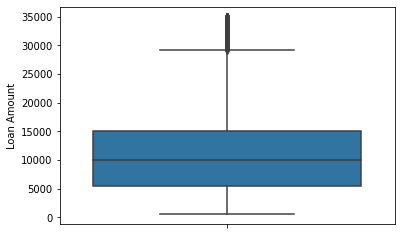

In [66]:
sns.boxplot( y=loan_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [68]:
# Basic statistics with .describe() -Quantitative Variables
loan_df.total_pymnt.describe()

count   39,717.00
mean    12,153.60
std      9,042.04
min          0.00
25%      5,576.93
50%      9,899.64
75%     16,534.43
max     58,563.68
Name: total_pymnt, dtype: float64

**Inference:** The loan amount varies from 0 to 35,000 having mean of 10,000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


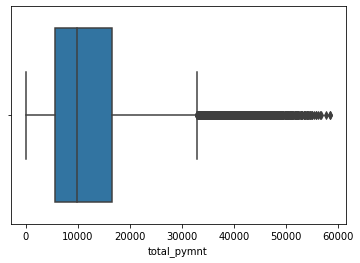

In [69]:
sns.boxplot(loan_df.total_pymnt)

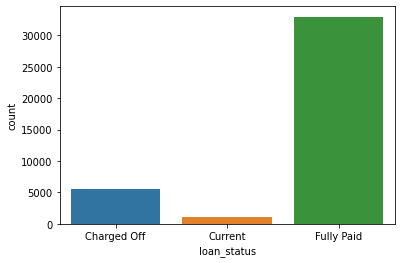

In [70]:
sns.countplot(x= loan_df["loan_status"])
plt.show()

In [71]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**Inference:** 
1. Most of the loans are Fully Paid. 
2. About 14% of loan are having status as defaulters.
3. We have a class imbalance here.

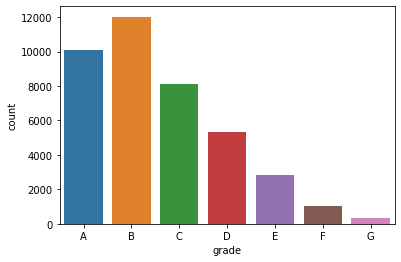

In [72]:
sns.countplot(x='grade', data=loan_df)
plt.show()

**Inference:** Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

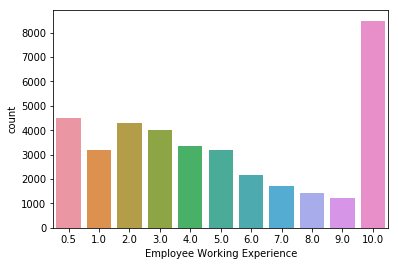

In [ ]:
sns.countplot(x='emp_length_years', data=loan_df)
plt.xlabel('Employee Working Experience')
plt.show()

**Inference:** Majority of employees applying for the loan have more than 10 years of experience

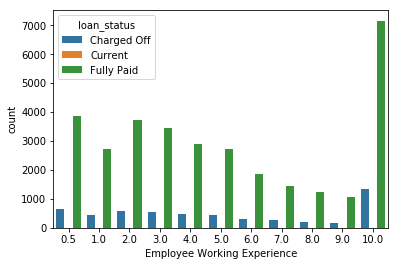

In [ ]:
sns.countplot(x='emp_length_years', hue='loan_status', data=loan_df)
plt.xlabel('Employee Working Experience')
plt.show()

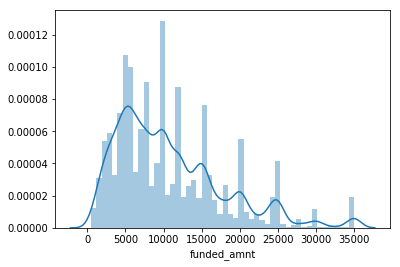

In [ ]:
sns.distplot(loan_df['funded_amnt'])
plt.show()

**Inference:** Funded amount is left skewed. Most of the loan amount given is 5 lakhs

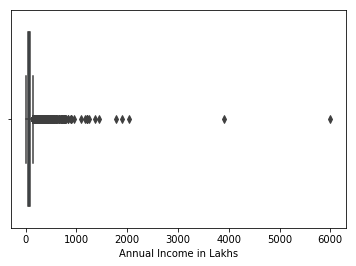

In [ ]:
sns.boxplot(x=loan_df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Inference:** There are only two applicants having annual income of more than 30 lakhs

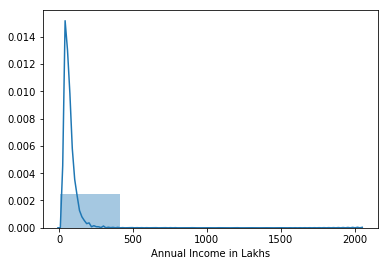

In [ ]:
sns.distplot(loan_df[loan_df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Inference:** Majority of loan applicants have income less than 5 lakhs

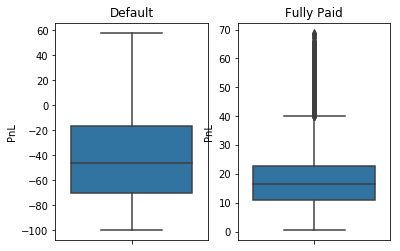

In [ ]:
# Relationship b/w Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan_df[loan_df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan_df[loan_df.loan_status=='Fully Paid'].PnL)
plt.show()

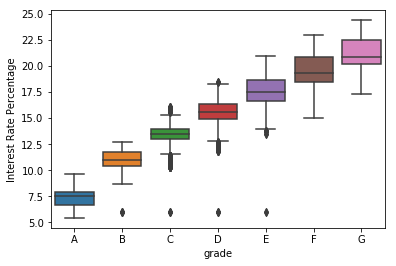

In [ ]:
sns.boxplot(y='int_rate_percentage', x='grade', data=loan_df)
plt.ylabel('Interest Rate Percentage')
plt.show()

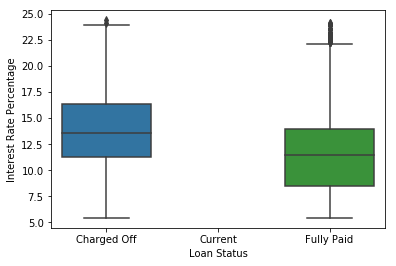

In [ ]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=loan_df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

## Segmented Univariate Analysis

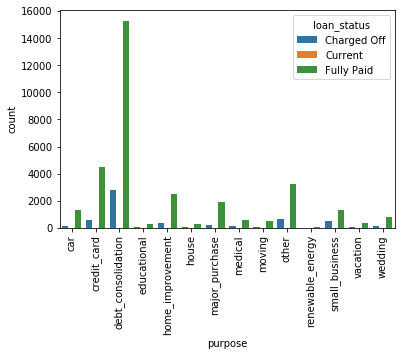

In [ ]:
sns.countplot(x='purpose', hue="loan_status", data=loan_df)
plt.xticks(rotation=90)
plt.show()

**Inference:** Majority of loan has been given for the debt consolidation purpose and has been fully paid.

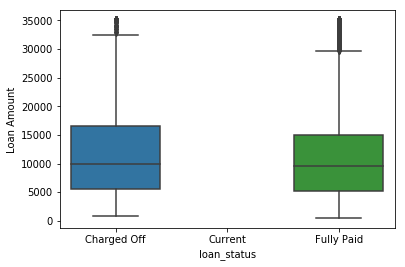

In [ ]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan_df)
plt.ylabel('Loan Amount')
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

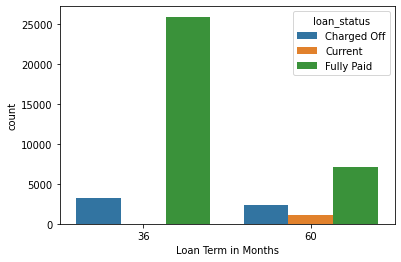

In [73]:
sns.countplot( x="term_months", hue='loan_status', data=loan_df)
plt.xlabel('Loan Term in Months')
plt.show()

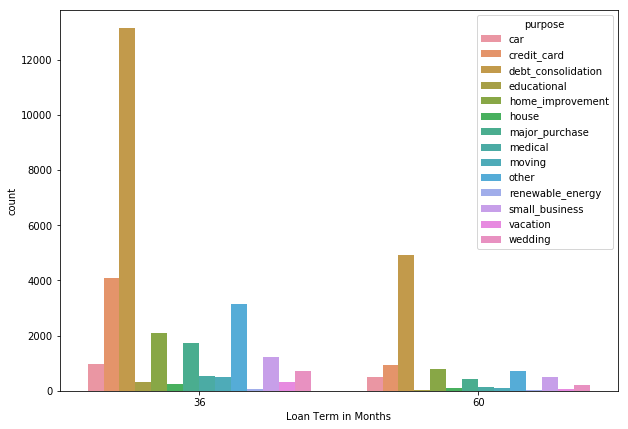

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=loan_df)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference:** Tenure of 36 months have have high chances to be defaulters

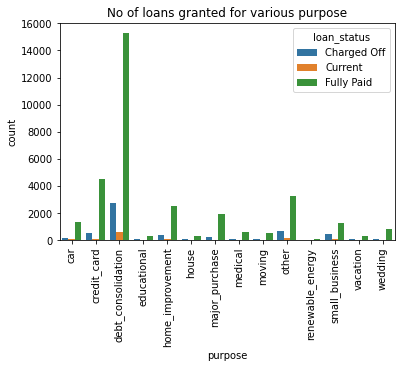

In [74]:
sns.countplot(x='purpose', hue='loan_status', data=loan_df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

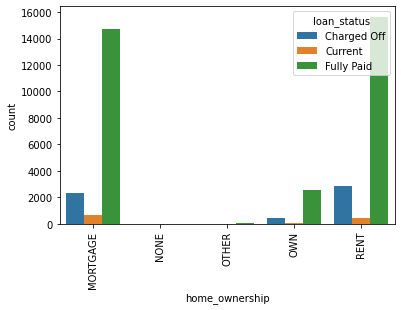

In [75]:
sns.countplot(x='home_ownership',hue='loan_status', data=loan_df)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis with Plots

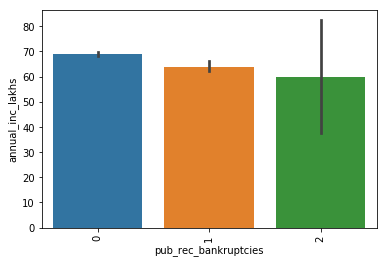

In [ ]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=loan_df)
plt.xticks(rotation=90)
plt.show()

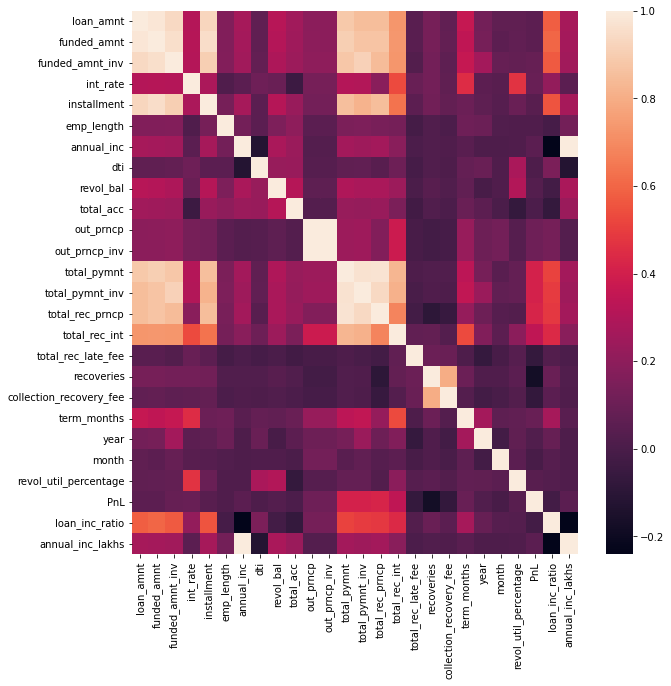

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr())
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

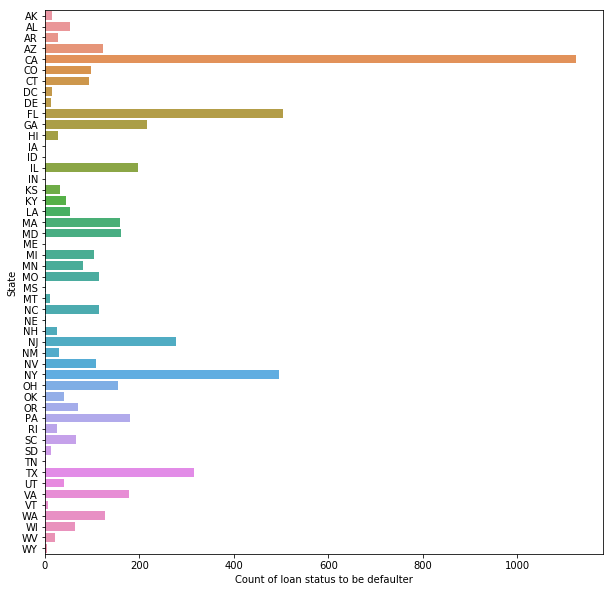

In [ ]:
g = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

**Inference:** Applicants from the state CA are having high probability to be default

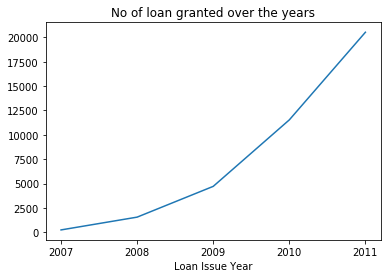

In [ ]:
g = loan_df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Inference:** Loan Applicants have been increasing exponentially from year 2007 to 2011

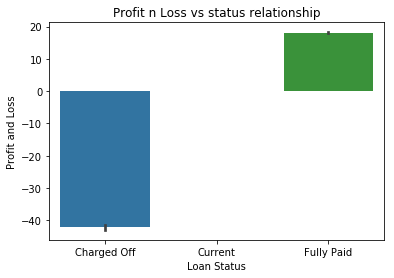

In [ ]:
# Relationship of defaults with funded amount
sns.barplot(x='loan_status',y='PnL',data=loan_df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

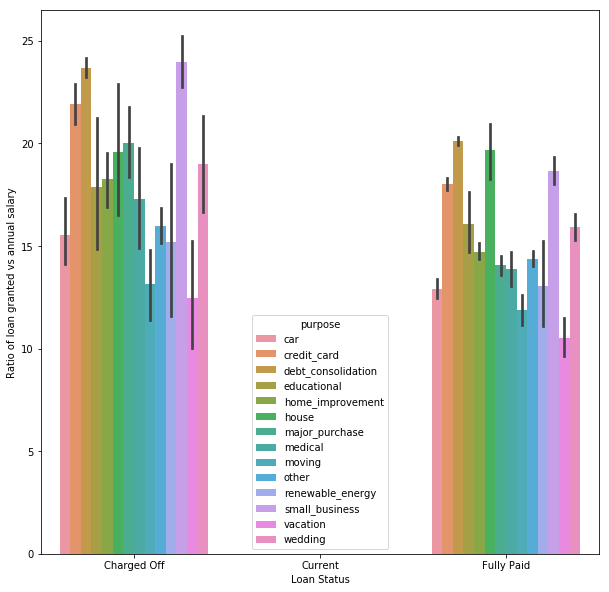

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [ ]:
df_agg = loan_df[loan_df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

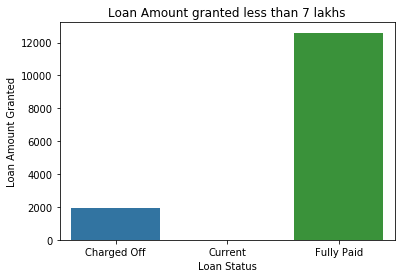

In [ ]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [ ]:
df_agg = loan_df[loan_df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

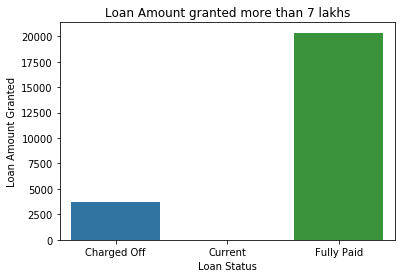

In [ ]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()